In [4]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch06.simple_convnet import SimpleConvNet
from common.trainer import Trainer


/mnt/batch/tasks/shared/LS_root/mounts/clusters/ml20250203/code/Users/6b022/DL3_20241006
/mnt/batch/tasks/shared/LS_root/mounts/clusters/ml20250203/code/Users/6b022


In [5]:
# MNiST 데이터 읽기=============
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄임
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 50

In [6]:
network = SimpleConvNet(
    input_dim=(1, 28, 28),
    conv_param = {'filter_num':40, 'filter_size': 5, 'pad':1, 'stride':1},
    hidden_size=100,
    output_size=10,
    weight_init_std=0.01
)

trainer = Trainer(network, x_train, t_train, x_test, t_test, 
    epochs=max_epochs,
    mini_batch_size=100, 
    optimizer='Adam',
    optimizer_param={'lr':0.001},
    evaluate_sample_num_per_epoch=1000
)

trainer.train()

train loss:2.298961778754881
=== epoch:1, train acc:0.174, test acc:0.196 ===
train loss:2.296530561526967
train loss:2.2897001024727652
train loss:2.279762227259416
train loss:2.2728640154293642
train loss:2.258719894761616
train loss:2.236157067184377
train loss:2.1841592388742863
train loss:2.1896268336115945
train loss:2.160538508947584
train loss:2.0984183687216817
train loss:2.0724117488829377
train loss:2.010041088942272
train loss:2.0207821134857515
train loss:1.9267899153486372
train loss:1.847008020155742
train loss:1.8084203764234135
train loss:1.636249841604335
train loss:1.5268849898603565
train loss:1.5870289085701241
train loss:1.3690117561338764
train loss:1.2693726818431188
train loss:1.1562099226173528
train loss:1.137727065091644
train loss:0.9451968914083801
train loss:0.8818843259740606
train loss:0.8951415459539155
train loss:0.8025899726831508
train loss:0.852945551274194
train loss:0.8899845451043766
train loss:0.6815707128005556
train loss:0.717349548330517
tra

Saved Network Parameters!


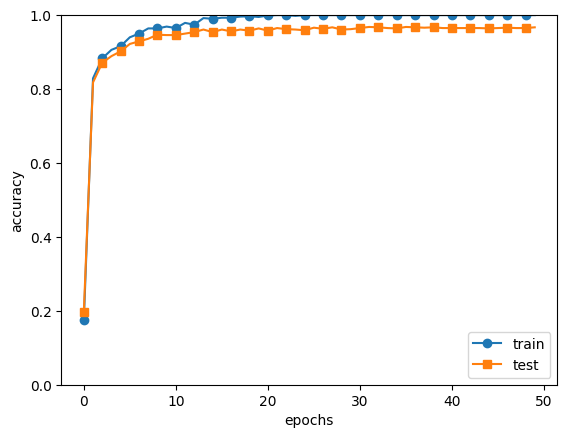

In [7]:
# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기 ==================
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()